## Importing modules

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Principles
Principles of tidy data
* Columns represent separate variables
* Rows represent individual observations
* Observational units form tables

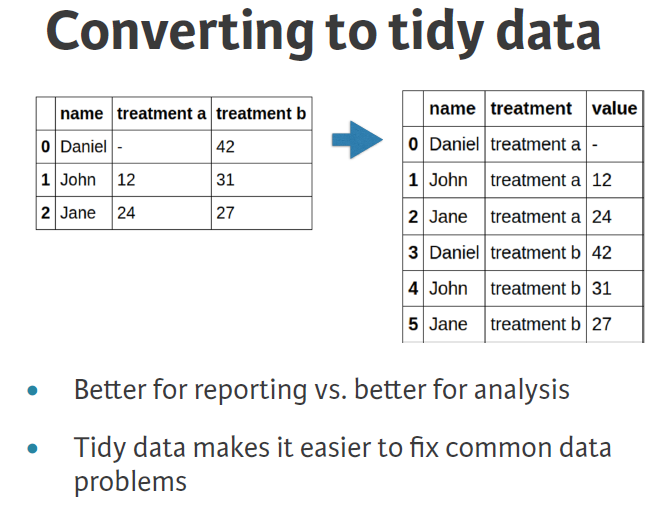

## Recognizing tidy data

For data to be tidy, it must have:

    Each variable as a separate column.
    Each row as a separate observation.

As a data scientist, you'll encounter data that is represented in a variety of different ways, so it is important to be able to recognize tidy (or untidy) data when you see it.

In this exercise, two example datasets have been pre-loaded into the DataFrames df1 and df2. Only one of them is tidy. Your job is to explore these further in the IPython Shell and identify the one that is not tidy, and why it is not tidy.

In the rest of this course, you will frequently be asked to explore the structure of DataFrames in the IPython Shell prior to performing different operations on them. Doing this will not only strengthen your comprehension of the data cleaning concepts covered in this course, but will also help you realize and take advantage of the relationship between working in the Shell and in the script.

In [2]:
df1 = pd.read_csv('df1.csv')
df2 = pd.read_csv('df2.csv')

In [3]:
print(df1.head())
print()
print(df2.head())
print()
print(df1.info())
print()
print(df2.info())

'''df2; each variable is not a separate column.'''

   Unnamed: 0  Day  Month  Ozone  Solar.R  Temp  Wind
0           0    1      5   41.0    190.0    67   7.4
1           1    2      5   36.0    118.0    72   8.0
2           2    3      5   12.0    149.0    74  12.6
3           3    4      5   18.0    313.0    62  11.5
4           4    5      5    NaN      NaN    56  14.3

   Unnamed: 0  Day  Month  value variable
0           0    1      5   41.0  'Ozone'
1           1    2      5   36.0  'Ozone'
2           2    3      5   12.0  'Ozone'
3           3    4      5   18.0  'Ozone'
4           4    5      5    NaN  'Ozone'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 7 columns):
Unnamed: 0    153 non-null int64
Day           153 non-null int64
Month         153 non-null int64
Ozone         116 non-null float64
Solar.R       146 non-null float64
Temp          153 non-null int64
Wind          153 non-null float64
dtypes: float64(3), int64(4)
memory usage: 8.4 KB
None

<class 'pandas.core.frame

'df2; each variable is not a separate column.'

## Reshaping your data using melt

Melting data is the process of turning columns of your data into rows of data. Consider the DataFrames from the previous exercise. In the tidy DataFrame, the variables Ozone, Solar.R, Wind, and Temp each had their own column. If, however, you wanted these variables to be in rows instead, you could melt the DataFrame. In doing so, however, you would make the data untidy! This is important to keep in mind: Depending on how your data is represented, you will have to reshape it differently.

In this exercise, you will practice melting a DataFrame using pd.melt(). There are two parameters you should be aware of: id_vars and value_vars. The id_vars represent the columns of the data you do not want to melt (i.e., keep it in its current shape), while the value_vars represent the columns you do wish to melt into rows. By default, if no value_vars are provided, all columns not set in the id_vars will be melted. This could save a bit of typing, depending on the number of columns that need to be melted.

The (tidy) DataFrame airquality has been pre-loaded. Your job is to melt its Ozone, Solar.R, Wind, and Temp columns into rows. Later in this chapter, you'll learn how to bring this melted DataFrame back into a tidy form.

* [pd.melt()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html)

In [4]:
# Firstly, let's take a look at the dataframe in its original form
airquality = pd.read_csv('airquality.csv')

# Print the head of airquality
airquality.head(10)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
5,28.0,NaN,14.9,66,5,6
6,23.0,299.0,8.6,65,5,7
7,19.0,99.0,13.8,59,5,8
8,8.0,19.0,20.1,61,5,9
9,NaN,194.0,8.6,69,5,10


This is actually already tidy but we will make it untidy in order to demonstrate this method. So let's turn those columns into row variables using melt. 

In [5]:
# Melt airquality: airquality_melt
airquality_melt = pd.melt(frame=airquality, id_vars=['Month', 'Day']) # Retain month and day as columns using id_vars
print(airquality_melt.head(),'\n')
print(airquality_melt.tail())

   Month  Day variable  value
0      5    1    Ozone   41.0
1      5    2    Ozone   36.0
2      5    3    Ozone   12.0
3      5    4    Ozone   18.0
4      5    5    Ozone    NaN 

     Month  Day variable  value
607      9   26     Temp   70.0
608      9   27     Temp   77.0
609      9   28     Temp   75.0
610      9   29     Temp   76.0
611      9   30     Temp   68.0


## Customizing melted data
When melting DataFrames, it would be better to have column names more meaningful than variable and value.

The default names may work in certain situations, but it's best to always have data that is self explanatory.

You can rename the variable column by specifying an argument to the var_name parameter, and the value column by specifying an argument to the value_name parameter. You will now practice doing exactly this. The DataFrame airquality has been pre-loaded for you.

In [6]:
# The column with all the variables we now name 'measurement' and the values column we rename 'reading'
airquality_melt = pd.melt(frame=airquality, id_vars=['Month', 'Day'], var_name='measurement', value_name='reading')
airquality_melt.head()

,Month,Day,measurement,reading
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN


# Pivoting data
Pivoting is the opposite of melting. In melting, we turned columns into rows. Pivoting turns rows into columns.
* Pivoting: turn unique values into separate columns
* Analysis friendly shape to reporting friendly shape
* Violates tidy data principle: rows contain observations
* Multiple variables stored in the same column


In [7]:
# Some intuition with a simpler dataset

df = pd.DataFrame({'foo': ['one','one','one','two','two','two'],
                       'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                       'baz': [1, 2, 3, 4, 5, 6]})
print(df,'\n')

df_new = df.pivot(index='foo', columns='bar', values='baz')
print(df_new)

  bar  baz  foo
0   A    1  one
1   B    2  one
2   C    3  one
3   A    4  two
4   B    5  two
5   C    6  two 

bar  A  B  C
foo         
one  1  2  3
two  4  5  6


## Pivot data
Remember the tidy form that the airquality DataFrame was in before you melted it? You'll now begin pivoting it back into that form using the .pivot_table() method!

While melting takes a set of columns and turns it into a single column, pivoting will create a new column for each unique value in a specified column.

.pivot_table() has an index parameter which you can use to specify the columns that you don't want pivoted: It is similar to the id_vars parameter of pd.melt(). Two other parameters that you have to specify are columns (the name of the column you want to pivot), and values (the values to be used when the column is pivoted). The melted DataFrame airquality_melt has been pre-loaded for you. This First example shows that pivot does not know how to handle duplicate values. 

* [df.pivot()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html)


In [8]:
# Pivot doesn't know how to handle duplicate values. 

try:
    airquality_pivot = airquality_melt.pivot(index='Month',columns='measurement', values='reading')
    airquality_pivot.head()
except ValueError:
    print('Error raised because of duplicate values')
    

Error raised because of duplicate values


The answer is to use a pivot_table. This has an index parameter which you can use to specify the columns that you don't want pivoted: It is similar to the id_vars parameter of pd.melt(). Two other parameters that you have to specify are columns (the name of the column you want to pivot), and values (the values to be used when the column is pivoted). 

* [pivot_table()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html)

In [9]:
airquality_pivot = airquality_melt.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading')
airquality_pivot.head()

measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5        NaN      NaN  56.0  14.3

## Resetting the index of a DataFrame

After pivoting airquality_melt in the previous exercise, you didn't quite get back the original DataFrame.

What you got back instead was a pandas DataFrame with a [hierarchical index (also known as a MultiIndex)](http://pandas.pydata.org/pandas-docs/stable/advanced.html).

Hierarchical indexes are covered in depth in [Manipulating DataFrames with pandas](https://www.datacamp.com/courses/manipulating-dataframes-with-pandas). In essence, they allow you to group columns or rows by another variable - in this case, by 'Month' as well as 'Day'.

There's a very simple method you can use to get back the original DataFrame from the pivoted DataFrame: .reset_index(). Dan didn't show you how to use this method in the video, but you're now going to practice using it in this exercise to get back the original DataFrame from airquality_pivot, which has been pre-loaded.

* [df.reset_index()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html)

In [10]:
# Show the index of the pivoted data
print(airquality_pivot.index)
print()

# Reset the index of airquality_pivot: airquality_pivot
airquality_pivot = airquality_pivot.reset_index()
print(airquality_pivot.index)

# Print the head of airquality_pivot
print(airquality_pivot.head())

MultiIndex(levels=[[5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8, 

## Pivoting duplicate values
So far, you've used the .pivot_table() method when there are multiple index values you want to hold constant during a pivot. In the video, Dan showed you how you can also use pivot tables to deal with duplicate values by providing an aggregation function through the aggfunc parameter. Here, you're going to combine both these uses of pivot tables.

Let's say your data collection method accidentally duplicated your dataset. Such a dataset, in which each row is duplicated, has been pre-loaded as airquality_dup. In addition, the airquality_melt DataFrame from the previous exercise has been pre-loaded. Explore their shapes in the IPython Shell by accessing their .shape attributes to confirm the duplicate rows present in airquality_dup.

You'll see that by using .pivot_table() and the aggfunc parameter, you can not only reshape your data, but also remove duplicates. Finally, you can then flatten the columns of the pivoted DataFrame using .reset_index().

In [25]:
airquality_dup = pd.read_csv('airquality_dup.csv')
airquality_pivot = airquality_dup.pivot_table(index=['Month', 'Day'], \
                                               columns='measurement', values='reading', aggfunc=np.mean)

# Reset the index of airquality_pivot
airquality_pivot = airquality_pivot.reset_index()

print(airquality_pivot.head())
print()
print(airquality.head())

measurement  Month  Day  Ozone  Solar.R  Temp  Wind
0                5    1   41.0    190.0  67.0   7.4
1                5    2   36.0    118.0  72.0   8.0
2                5    3   12.0    149.0  74.0  12.6
3                5    4   18.0    313.0  62.0  11.5
4                5    5    NaN      NaN  56.0  14.3

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5


The default aggregation function used by .pivot_table() is np.mean(). So you could have pivoted the duplicate values in this DataFrame even without explicitly specifying the aggfunc parameter

# Beyond melt and pivot

## Splitting a column with .str

The dataset you saw in the video, consisting of case counts of tuberculosis by country, year, gender, and age group, has been pre-loaded into a DataFrame as tb.

In this exercise, you're going to tidy the 'm014' column, which represents males aged 0-14 years of age. In order to parse this value, you need to extract the first letter into a new column for gender, and the rest into a column for age_group. Here, since you can parse values by position, you can take advantage of pandas' vectorized string slicing by using the str attribute of columns of type object.

Begin by printing the columns of tb in the IPython Shell using its .columns attribute, and take note of the problematic column.

* [.str attribute](http://pandas.pydata.org/pandas-docs/version/0.20/text.html)

In [28]:
tb = pd.read_csv("tb.csv")
print(tb.head(),'\n')
tb.columns

  country  year  m014  m1524  m2534  m3544  m4554  m5564   m65  mu  f014  \
0      AD  2000   0.0    0.0    1.0    0.0    0.0    0.0   0.0 NaN   NaN   
1      AE  2000   2.0    4.0    4.0    6.0    5.0   12.0  10.0 NaN   3.0   
2      AF  2000  52.0  228.0  183.0  149.0  129.0   94.0  80.0 NaN  93.0   
3      AG  2000   0.0    0.0    0.0    0.0    0.0    0.0   1.0 NaN   1.0   
4      AL  2000   2.0   19.0   21.0   14.0   24.0   19.0  16.0 NaN   3.0   

   f1524  f2534  f3544  f4554  f5564   f65  fu  
0    NaN    NaN    NaN    NaN    NaN   NaN NaN  
1   16.0    1.0    3.0    0.0    0.0   4.0 NaN  
2  414.0  565.0  339.0  205.0   99.0  36.0 NaN  
3    1.0    1.0    0.0    0.0    0.0   0.0 NaN  
4   11.0   10.0    8.0    8.0    5.0  11.0 NaN   



Index(['country', 'year', 'm014', 'm1524', 'm2534', 'm3544', 'm4554', 'm5564',
       'm65', 'mu', 'f014', 'f1524', 'f2534', 'f3544', 'f4554', 'f5564', 'f65',
       'fu'],
      dtype='object')

In [27]:
# Melt tb: tb_melt
tb_melt = pd.melt(frame=tb, id_vars=['country', 'year'])

# Create the 'gender' column
tb_melt['gender'] = tb_melt.variable.str[0]

# Create the 'age_group' column
tb_melt['age_group'] = tb_melt.variable.str[1:]

# Print the head of tb_melt
print(tb_melt.head())

  country  year variable  value gender age_group
0      AD  2000     m014    0.0      m       014
1      AE  2000     m014    2.0      m       014
2      AF  2000     m014   52.0      m       014
3      AG  2000     m014    0.0      m       014
4      AL  2000     m014    2.0      m       014


In [15]:
# Deleting the redundant column
del tb_melt['variable']
tb_melt.head()

,country,year,value,gender,age_group
0,AD,2000,0.0,m,014
1,AE,2000,2.0,m,014
2,AF,2000,52.0,m,014
3,AG,2000,0.0,m,014
4,AL,2000,2.0,m,014


## Splitting a column with .split() and .get()

Another common way multiple variables are stored in columns is with a delimiter. You'll learn how to deal with such cases in this exercise, using a [dataset consisting of Ebola cases and death counts by state and country](https://data.humdata.org/dataset/ebola-cases-2014). 

Print the columns of ebola in the IPython Shell using ebola.columns. Notice that the data has column names such as Cases_Guinea and Deaths_Guinea. Here, the underscore _ serves as a delimiter between the first part (cases or deaths), and the second part (country).

This time, you cannot directly slice the variable by position as in the previous exercise. You now need to use Python's built-in string method called .split(). By default, this method will split a string into parts separated by a space. However, in this case you want it to split by an underscore. You can do this on Cases_Guinea, for example, using Cases_Guinea.split('_'), which returns the list ['Cases', 'Guinea'].

The next challenge is to extract the first element of this list and assign it to a type variable, and the second element of the list to a country variable. You can accomplish this by accessing the str attribute of the column and using the .get() method to retrieve the 0 or 1 index, depending on the part you want.

* [.split()](https://www.tutorialspoint.com/python/string_split.htm)

In [29]:
# First get the ebola data
ebola = pd.read_csv("ebola.csv")
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [17]:
# Now do a usual melt on these data
ebola_melt = pd.melt(ebola, id_vars=['Date', 'Day'], var_name='type_country', value_name='counts')
ebola_melt.head()

,Date,Day,type_country,counts
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


In [18]:
# Creating the string split column

ebola_melt['str_split'] = ebola_melt.type_country.str.split('_')
ebola_melt.head()

,Date,Day,type_country,counts,str_split
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]"
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]"
2,1/3/2015,287,Cases_Guinea,2769.0,"[Cases, Guinea]"
3,1/2/2015,286,Cases_Guinea,NaN,"[Cases, Guinea]"
4,12/31/2014,284,Cases_Guinea,2730.0,"[Cases, Guinea]"


In [19]:
# Create the 'type' column
ebola_melt['type'] = ebola_melt.str_split.str.get(0)

# Create the 'country' column
ebola_melt['country'] = ebola_melt.str_split.str.get(1)
ebola_melt.head()

,Date,Day,type_country,counts,str_split,type,country
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]",Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]",Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,"[Cases, Guinea]",Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,"[Cases, Guinea]",Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,"[Cases, Guinea]",Cases,Guinea


In [20]:
# Delete redundant columns

del ebola_melt['type_country']
del ebola_melt['str_split']
ebola_melt.head()

,Date,Day,counts,type,country
0,1/5/2015,289,2776.0,Cases,Guinea
1,1/4/2015,288,2775.0,Cases,Guinea
2,1/3/2015,287,2769.0,Cases,Guinea
3,1/2/2015,286,NaN,Cases,Guinea
4,12/31/2014,284,2730.0,Cases,Guinea


In [21]:
ebola_melt.to_csv('ebola_melt.csv')

## Appendix: Methods

__Methods__
* [pd.melt()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html)
* [df.pivot()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html)
* [pivot_table()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html)
* [df.reset_index()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html)
* [.split()](https://www.tutorialspoint.com/python/string_split.htm)

__Attributes__
* [.str()](http://pandas.pydata.org/pandas-docs/version/0.20/text.html)